# Firedrake

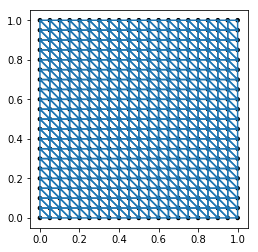

In [2]:
import firedrake as fd

# Number of grid points in each direction, including boundary nodes
Nx = 20
Ny = Nx

# create square mesh of width and length 1 (use RectangleMesh if you want other dimensions)
# and divide it into Nx by Ny squares each divided in two triangles
mesh = fd.UnitSquareMesh(Nx, Ny)

fd.plot(mesh)

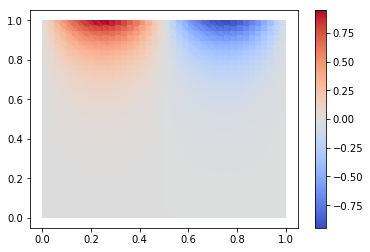

In [9]:
# define a function space consisting of piecewise linear functions
# also known as the P1CG (Continuous Galerkin) function space
V = fd.FunctionSpace(mesh, "CG", 1)

# u is the function we are solving for, and v is the test function
u = fd.Function(V)
v = fd.TestFunction(V)

# right hand side
f = 0

# full equation in the weak form with all terms on the lhs, after integration by parts:
F = fd.dot(fd.grad(v), fd.grad(u)) * fd.dx + v*f * fd. dx(domain=mesh)

x, y = fd.SpatialCoordinate(mesh)

# using UnitSquareMesh (or RectangleMesh), the left, right, bottom and top boundaries 
# are numbered 1, 2, 3, and 4 respectively
bc_top = fd.DirichletBC(V, fd.sin(2*fd.pi*x), 4)
bc_other = fd.DirichletBC(V, 0, (1,2,3))

fd.solve(F == 0, u, bcs=[bc_top, bc_other])

fd.plot(u)